We are getting features for each players in order to forecast performance

In [1]:
import requests

In [2]:
#getting id for premier league
url = "https://sofascore.p.rapidapi.com/tournaments/list"
querystring = {"categoryId":"1"}
headers = {
	"x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
	"x-rapidapi-host": "sofascore.p.rapidapi.com"
}
response_eng = requests.get(url, headers=headers, params=querystring)
data_eng = response_eng.json()

premier_league_id = None

for group in data_eng['groups']:
    for tournament in group['uniqueTournaments']:
        if tournament['name'] == "Premier League":
            premier_league_id = tournament['id']
print(f"Premier League ID: {premier_league_id}")


Premier League ID: 17


In [3]:
#building a dictionnary with our target players
url = "https://sofascore.p.rapidapi.com/tournaments/get-top-players"
querystring = {"tournamentId": premier_league_id, "seasonId": "61627"}
headers = {
    "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
    "x-rapidapi-host": "sofascore.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
data = response.json()
players = data['topPlayers']['rating']
#sort by rating
top_10_players = sorted(players, key=lambda x: x['statistics']['rating'], reverse=True)
#only forwards (attackers)
top_10_premier_league = [
    {
        "name": player['player']['name'],
        "rating": player['statistics']['rating'],
        "appearances": player['statistics']['appearances'],
        "team": player['team']['name'],
        "position": player['player']['position'],
        "id": player['player']['id']
    }
    for player in top_10_players if player['player']['position'] == 'F'
][:10]

print(top_10_premier_league)


[{'name': 'Mohamed Salah', 'rating': 7.99375, 'appearances': 16, 'team': 'Liverpool', 'position': 'F', 'id': 159665}, {'name': 'Bukayo Saka', 'rating': 7.93125, 'appearances': 16, 'team': 'Arsenal', 'position': 'F', 'id': 934235}, {'name': 'Matheus Cunha', 'rating': 7.6, 'appearances': 17, 'team': 'Wolverhampton', 'position': 'F', 'id': 886363}, {'name': 'Heung-min Son', 'rating': 7.5357142857143, 'appearances': 14, 'team': 'Tottenham Hotspur', 'position': 'F', 'id': 111505}, {'name': 'Bryan Mbeumo', 'rating': 7.5176470588235, 'appearances': 17, 'team': 'Brentford', 'position': 'F', 'id': 927083}, {'name': 'Alexander Isak', 'rating': 7.36, 'appearances': 15, 'team': 'Newcastle United', 'position': 'F', 'id': 823941}, {'name': 'Erling Haaland', 'rating': 7.3, 'appearances': 17, 'team': 'Manchester City', 'position': 'F', 'id': 839956}, {'name': 'Luis Díaz', 'rating': 7.225, 'appearances': 16, 'team': 'Liverpool', 'position': 'F', 'id': 883537}, {'name': 'Brennan Johnson', 'rating': 7.2,

Let's visualise properties for each player (M. Salah)

In [4]:

#details
url = "https://sofascore.p.rapidapi.com/players/detail"
querystring = {"playerId":"159665"}
headers = {
	"x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
	"x-rapidapi-host": "sofascore.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
print(response.json())

{'player': {'name': 'Mohamed Salah', 'slug': 'mohamed-salah', 'shortName': 'M. Salah', 'team': {'name': 'Liverpool', 'slug': 'liverpool', 'shortName': 'Liverpool', 'gender': 'M', 'sport': {'name': 'Football', 'slug': 'football', 'id': 1}, 'tournament': {'name': 'Premier League', 'slug': 'premier-league', 'category': {'name': 'England', 'slug': 'england', 'sport': {'name': 'Football', 'slug': 'football', 'id': 1}, 'id': 1, 'country': {'alpha2': 'EN', 'alpha3': 'ENG', 'name': 'England', 'slug': 'england'}, 'flag': 'england', 'alpha2': 'EN'}, 'uniqueTournament': {'name': 'Premier League', 'slug': 'premier-league', 'primaryColorHex': '#3c1c5a', 'secondaryColorHex': '#f80158', 'category': {'name': 'England', 'slug': 'england', 'sport': {'name': 'Football', 'slug': 'football', 'id': 1}, 'id': 1, 'country': {'alpha2': 'EN', 'alpha3': 'ENG', 'name': 'England', 'slug': 'england'}, 'flag': 'england', 'alpha2': 'EN'}, 'userCount': 1378017, 'id': 17, 'country': {}, 'displayInverseHomeAwayTeams': F

In [5]:
#attributes
url = "https://sofascore.p.rapidapi.com/players/get-attribute-overviews"
querystring = {"playerId":"159665"}
headers = {
	"x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
	"x-rapidapi-host": "sofascore.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
print(response.json())

{'averageAttributeOverviews': [{'attacking': 62, 'technical': 54, 'tactical': 44, 'defending': 32, 'creativity': 47, 'position': 'F', 'yearShift': 0, 'id': 19812}], 'playerAttributeOverviews': [{'attacking': 89, 'technical': 66, 'tactical': 60, 'defending': 28, 'creativity': 80, 'position': 'F', 'yearShift': 0, 'id': 11015}, {'attacking': 89, 'technical': 63, 'tactical': 60, 'defending': 24, 'creativity': 79, 'position': 'F', 'yearShift': 1, 'id': 11016}, {'attacking': 85, 'technical': 57, 'tactical': 61, 'defending': 23, 'creativity': 74, 'position': 'F', 'yearShift': 2, 'id': 11017}, {'attacking': 91, 'technical': 66, 'tactical': 66, 'defending': 26, 'creativity': 75, 'position': 'F', 'yearShift': 3, 'id': 11018}]}


In [6]:
url = "https://sofascore.p.rapidapi.com/players/get-last-ratings"
querystring = {"playerId":"159665", "tournamentId":"17", "seasonId":"61627"}
headers = {
    "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
    "x-rapidapi-host": "sofascore.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
data = response.json()

last_ratings = data.get('lastRatings', [])
if last_ratings:
    #5 last games
    for i, rating_data in enumerate(last_ratings[:5]):
        match = rating_data.get('event', {})
        tournament = match.get('tournament', {}).get('name', 'N/A')
        home_team = match.get('homeTeam', {}).get('name', 'N/A')
        away_team = match.get('awayTeam', {}).get('name', 'N/A')
        rating = rating_data.get('rating', 'N/A')  
        home_score = match.get('homeScore', {}).get('current', 'N/A')
        away_score = match.get('awayScore', {}).get('current', 'N/A')
        match_id = match.get('id', 'N/A')
        print(f"\nMatch {i+1} (ID: {match_id}): {home_team} vs {away_team}")
        print(f"Tournament: {tournament}")
        print(f"Player's Rating: {rating}")
        print(f"Score: {home_team} {home_score} - {away_team} {away_score}")
else:
    print("No ratings found.")



Match 1 (ID: 12436471): Tottenham Hotspur vs Liverpool
Tournament: Premier League
Player's Rating: 9.4
Score: Tottenham Hotspur 3 - Liverpool 6

Match 2 (ID: 12436446): Liverpool vs Fulham
Tournament: Premier League
Player's Rating: 7.3
Score: Liverpool 2 - Fulham 2

Match 3 (ID: 12436978): Newcastle United vs Liverpool
Tournament: Premier League
Player's Rating: 9.1
Score: Newcastle United 3 - Liverpool 3

Match 4 (ID: 12436504): Liverpool vs Manchester City
Tournament: Premier League
Player's Rating: 7.9
Score: Liverpool 2 - Manchester City 0

Match 5 (ID: 12436506): Southampton vs Liverpool
Tournament: Premier League
Player's Rating: 8.2
Score: Southampton 2 - Liverpool 3


In [7]:
#stats for salah in tot-liv
url = "https://sofascore.p.rapidapi.com/matches/get-player-statistics"
querystring = {"matchId": "12436471", "playerId": "159665"}
headers = {
    "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
    "x-rapidapi-host": "sofascore.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    data = response.json()
    
    player_stats = data.get('playerStatistics', {})
    
    if player_stats:
        print(f"Stats pour Mohamed Salah (ID: 159665) - Match Tottenham Hotspur vs Liverpool:")
        
        goals = player_stats.get('goals', 0)
        assists = player_stats.get('assists', 0)
        yellow_cards = player_stats.get('yellowCards', 0)
        red_cards = player_stats.get('redCards', 0)
        shots_on_target = player_stats.get('shotsOnTarget', 0)
        total_shots = player_stats.get('totalShots', 0)
        minutes_played = player_stats.get('minutesPlayed', 0)
        passes_completed = player_stats.get('passesCompleted', 0)
        pass_accuracy = player_stats.get('passAccuracy', 0)
        
        #display
        print(f"  - Buts marqués: {goals}")
        print(f"  - Passes décisives: {assists}")
        print(f"  - Cartons jaunes: {yellow_cards}")
        print(f"  - Cartons rouges: {red_cards}")
        print(f"  - Tirs cadrés: {shots_on_target}/{total_shots}")
        print(f"  - Minutes jouées: {minutes_played}")
        print(f"  - Passes complétées: {passes_completed}")
        print(f"  - Précision des passes: {pass_accuracy}%")
    else:
        print("Aucune statistique disponible pour ce joueur.")
else:
    print(f"Erreur: Impossible de récupérer les statistiques, code de statut {response.status_code}")


Aucune statistique disponible pour ce joueur.


In [8]:
url = "https://sofascore.p.rapidapi.com/matches/get-player-statistics"
querystring = {"matchId": "12436471", "playerId": "159665"}
headers = {
    "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
    "x-rapidapi-host": "sofascore.p.rapidapi.com"
}
response = requests.get(url, headers=headers, params=querystring)
print(response.json())

{'player': {'name': 'Mohamed Salah', 'slug': 'mohamed-salah', 'shortName': 'M. Salah', 'position': 'F', 'jerseyNumber': '11', 'height': 175, 'userCount': 306283, 'id': 159665, 'marketValueCurrency': 'EUR', 'dateOfBirthTimestamp': 708566400, 'proposedMarketValueRaw': {'value': 53000000, 'currency': 'EUR'}, 'fieldTranslations': {'nameTranslation': {'ar': 'صلاح, محمد'}, 'shortNameTranslation': {'ar': 'م. صلاح'}}}, 'team': {'name': 'Liverpool', 'slug': 'liverpool', 'shortName': 'Liverpool', 'gender': 'M', 'sport': {'name': 'Football', 'slug': 'football', 'id': 1}, 'userCount': 2460053, 'nameCode': 'LIV', 'disabled': False, 'national': False, 'type': 0, 'id': 44, 'entityType': 'team', 'teamColors': {'primary': '#cc0000', 'secondary': '#ffffff', 'text': '#ffffff'}, 'fieldTranslations': {'nameTranslation': {'ar': 'ليفربول', 'ru': 'Ливерпуль', 'hi': 'लिवरपूल'}, 'shortNameTranslation': {'ar': 'ليفربول', 'hi': 'लिवरपूल'}}}, 'statistics': {'totalPass': 14, 'accuratePass': 10, 'goalAssist': 2, 'to

In [9]:
#stats for salah for tottenham-liverpool
url = "https://sofascore.p.rapidapi.com/matches/get-player-statistics"
querystring = {"matchId": "12436471", "playerId": "159665"}
headers = {
    "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
    "x-rapidapi-host": "sofascore.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

if response.status_code == 200:
    data = response.json()
    player_info = data.get('player', {})
    player_stats = data.get('statistics', {})
    
    if player_info and player_stats:
        player_name = player_info.get('name', 'N/A')
        player_position = player_info.get('position', 'N/A')
        player_team = player_info.get('team', {}).get('name', 'N/A')
        player_jersey_number = player_info.get('jerseyNumber', 'N/A')
        goals = player_stats.get('goals', 0)
        goal_assists = player_stats.get('goalAssist', 0)
        shots_on_target = player_stats.get('onTargetScoringAttempt', 0)
        shots_off_target = player_stats.get('shotOffTarget', 0)
        big_chance_created = player_stats.get('bigChanceCreated', 0)
        big_chance_missed = player_stats.get('bigChanceMissed', 0)
        key_passes = player_stats.get('keyPass', 0)
        touches = player_stats.get('touches', 0)
        minutes_played = player_stats.get('minutesPlayed', 0)
        fouls_committed = player_stats.get('wasFouled', 0)
        duels_won = player_stats.get('duelWon', 0)
        duels_lost = player_stats.get('duelLost', 0)
        rating = player_stats.get('rating', 'N/A')
        expected_goals = player_stats.get('expectedGoals', 0)
        expected_assists = player_stats.get('expectedAssists', 0)
        
        #display
        print(f"  - Buts marqués: {goals}")
        print(f"  - Passes décisives: {goal_assists}")
        print(f"  - Tirs cadrés: {shots_on_target}")
        print(f"  - Tirs non cadrés: {shots_off_target}")
        print(f"  - Grosses occasions créées: {big_chance_created}")
        print(f"  - Grosses occasions manquées: {big_chance_missed}")
        print(f"  - Passes clés: {key_passes}")
        print(f"  - Touches de balle: {touches}")
        print(f"  - Minutes jouées: {minutes_played}")
        print(f"  - Fautes subies: {fouls_committed}")
        print(f"  - Duels gagnés: {duels_won}")
        print(f"  - Duels perdus: {duels_lost}")
        print(f"  - Note du joueur: {rating}")
        print(f"  - Attentes de buts (xG): {expected_goals}")
        print(f"  - Attentes de passes décisives (xA): {expected_assists}")
    else:
        print("Aucune statistique disponible pour ce joueur.")
else:
    print(f"Erreur: Impossible de récupérer les statistiques, code de statut {response.status_code}")


  - Buts marqués: 2
  - Passes décisives: 2
  - Tirs cadrés: 3
  - Tirs non cadrés: 2
  - Grosses occasions créées: 2
  - Grosses occasions manquées: 1
  - Passes clés: 3
  - Touches de balle: 32
  - Minutes jouées: 87
  - Fautes subies: 1
  - Duels gagnés: 2
  - Duels perdus: 6
  - Note du joueur: 9.4
  - Attentes de buts (xG): 1.9089
  - Attentes de passes décisives (xA): 0.149583


In [10]:
!pip install matplotlib seaborn numpy

{'heatmap': [{'x': 73, 'y': 49}, {'x': 86, 'y': 62}, {'x': 85, 'y': 62}, {'x': 87, 'y': 28}, {'x': 87, 'y': 28}, {'x': 95, 'y': 43}, {'x': 47, 'y': 18}, {'x': 88, 'y': 41}, {'x': 88, 'y': 41}, {'x': 91, 'y': 41}, {'x': 89, 'y': 36}, {'x': 80, 'y': 31}, {'x': 95, 'y': 25}, {'x': 94, 'y': 24}, {'x': 92, 'y': 29}, {'x': 77, 'y': 48}, {'x': 75, 'y': 27}, {'x': 79, 'y': 7}, {'x': 87, 'y': 26}, {'x': 96, 'y': 49}, {'x': 89, 'y': 27}, {'x': 78, 'y': 34}, {'x': 57, 'y': 5}, {'x': 90, 'y': 51}, {'x': 53, 'y': 6}, {'x': 47, 'y': 12}, {'x': 48, 'y': 10}, {'x': 54, 'y': 30}, {'x': 52, 'y': 26}, {'x': 78, 'y': 22}, {'x': 80, 'y': 25}, {'x': 78, 'y': 13}, {'x': 78, 'y': 33}]}


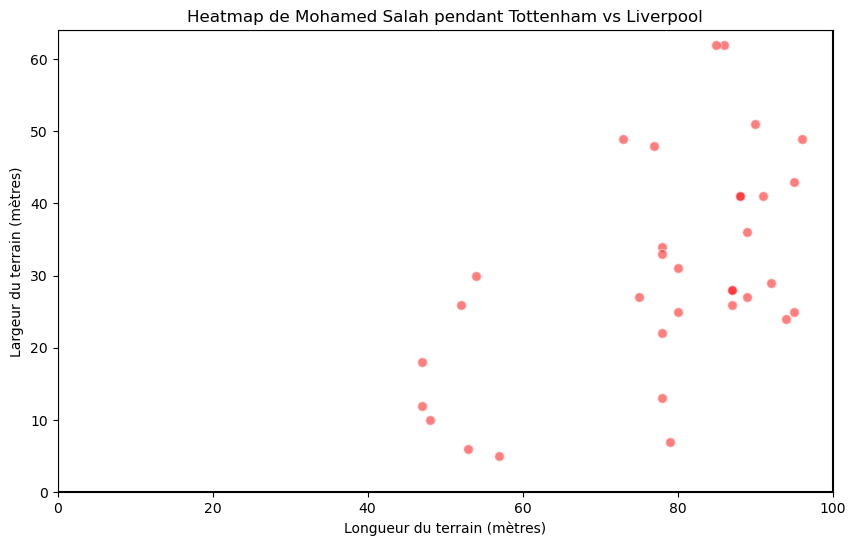

In [13]:
import requests
import matplotlib.pyplot as plt

# URL pour récupérer la heatmap du joueur
url = "https://sofascore.p.rapidapi.com/matches/get-player-heatmap"
querystring = {"matchId": "12436471", "playerId": "159665"}
headers = {
    "x-rapidapi-key": "3372c5dccemsh63586243fcebfbep104b94jsn6c41f060e7b8",
    "x-rapidapi-host": "sofascore.p.rapidapi.com"
}

# Récupérer les données de la heatmap
response = requests.get(url, headers=headers, params=querystring)

# Vérifier le format de la réponse
data = response.json()

# Afficher les données pour inspecter leur structure (si besoin)
print(data)

# Supposons que les coordonnées de la heatmap soient dans un champ appelé 'heatmap'
if "heatmap" in data:
    heatmap_data = data["heatmap"]

    # Extraire les coordonnées x et y des points de la heatmap
    x_coords = [point["x"] for point in heatmap_data]  # Coordonnée x du point
    y_coords = [point["y"] for point in heatmap_data]  # Coordonnée y du point

    # Dimensions du terrain de football (en général, un terrain fait 100x64 mètres)
    pitch_length = 100  # Longueur du terrain (en mètres)
    pitch_width = 64    # Largeur du terrain (en mètres)

    # Créer une figure pour la heatmap
    plt.figure(figsize=(10, 6))

    # Affichage du terrain de football sans grille
    plt.plot([0, 0], [0, pitch_width], color="black")  # Lignes verticales
    plt.plot([pitch_length, pitch_length], [0, pitch_width], color="black")
    plt.plot([0, pitch_length], [0, 0], color="black")  # Lignes horizontales
    plt.plot([0, pitch_length], [pitch_width, pitch_width], color="black")

    # Tracer la heatmap sur le terrain (utilisation d'un scatter plot)
    plt.scatter(x_coords, y_coords, c='red', alpha=0.5, edgecolors="w", s=50)  # Points rouges avec transparence

    # Ajouter un titre et des labels
    plt.title("Heatmap de Mohamed Salah pendant Tottenham vs Liverpool")
    plt.xlabel("Longueur du terrain (mètres)")
    plt.ylabel("Largeur du terrain (mètres)")

    # Définir les limites du terrain
    plt.xlim(0, pitch_length)
    plt.ylim(0, pitch_width)

    # Afficher la heatmap
    plt.show()

else:
    print("Aucune donnée de heatmap trouvée dans la réponse.")
